<a href="https://colab.research.google.com/github/HarshESC/TalkData-Mobile-Demographics/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import normaltest



from sklearn.cluster import (
    KMeans,
    DBSCAN,
    AffinityPropagation,
    MeanShift,
)
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from collections import Counter, defaultdict
from sklearn import metrics

import time


import warnings
warnings.filterwarnings('ignore')
from google.colab import drive 
drive.mount('/content/gdrive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/"
%cd "/content/gdrive/My Drive/Final Capstone"


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Final Capstone


In [2]:
# Applying random sample to increase run time speed
master_df = pd.read_csv("master_clean.csv")
master_df = master_df.sample(10000, random_state=13)
master_df.head()


,event_id,app_id,is_active,device_id,251,252,253,254,256,262,263,302,303,306,326,405,406,407,548,549,551,558,562,564,565,566,english_phone_brand_asus,english_phone_brand_coolpad,english_phone_brand_hammer,english_phone_brand_huawei,english_phone_brand_lshi,english_phone_brand_meizu,english_phone_brand_oppo,english_phone_brand_qiku,english_phone_brand_samsung,english_phone_brand_vivo,english_phone_brand_xiaomi,device_model_Galaxy Note 3,device_model_Galaxy Note 4,device_model_Galaxy S5,device_model_Galaxy S6,device_model_MI 3,device_model_MI 4,device_model_MX4,device_model_MX4 Pro,device_model_MX5,device_model_Mate 7,device_model_P8 Lite,device_model_P8max,device_model_R7 Plus,device_model_U3,device_model_X5SL,device_model_ZenFone 2,device_model_note顶配版,device_model_坚果手机,device_model_大神Note3,device_model_小米4C,device_model_小米note,device_model_红米2,device_model_红米2A,device_model_红米Note2,device_model_红米Note3,device_model_红米note,device_model_荣耀3C,device_model_荣耀6,device_model_荣耀6 Plus,device_model_荣耀7,device_model_荣耀7i,device_model_荣耀X2,device_model_荣耀畅玩4C,device_model_荣耀畅玩5X,device_model_超级手机1,device_model_超级手机1 Pro,device_model_超级手机1s,device_model_青春版,device_model_魅蓝NOTE,device_model_魅蓝metal,num_group
9831,405967,-9142957261685295367,0,-6580990884053387838,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1860,23529,-5617926790284095062,0,-1237716434446458619,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1103,7808,-2917998150844653076,0,1271622673586146475,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
473,2645,-5839858269967688123,0,-5044894706100277902,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2773,34376,7536856914263861653,0,-9170266620213363189,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


In [3]:
# Create copy of data frame and rename to be used for clustering
master_cluster_df = master_df.copy()


In [4]:
# drop columns that won't be necessary for clustering data
master_cluster_df = master_cluster_df.drop(columns=["app_id", "device_id", "event_id"])


# Clustering

For clustering I will be using 2 dimensionality reduction methods (PCA & t-sne) and 2 clustering algorithms (KMeans and Gaussian Mixture Models)

First I will apply PCA to the 2 different methods. Since I am applying PCA it is important to scale and standardize the data.



# Applying PCA to Data

In [5]:
# need to standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(master_cluster_df)


In [6]:
# Computing the principal components
pca = PCA()
X_pca = pca.fit_transform(X_std)


In [7]:
# I plan to use the amount of components that add up to 60% variance.
n_components = np.sum(np.cumsum(pca.explained_variance_ratio_) < 0.60)
X_pca = X_pca[:, :n_components]


In [8]:
# check to see the amount of components being used
n_components


24

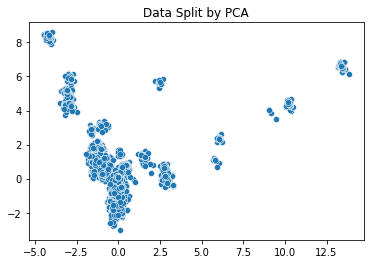

In [9]:
# adding a scatterplot to visualize how the data was split using PCA
# just eyeballing the plot there does not appear to be any noticeable clusters.
sns.scatterplot(X_pca[:, 0], X_pca[:, 1])
plt.title("Data Split by PCA")
plt.show()


# Applying KMeans to the Data

To keep cluster results consistant I am applying a random state of 13 so when I close the notebook and come back to it at later times my results will remain the same. I am choosing to create 3-10 clusters and compare those results.



In [35]:
for c in range(3, 11):
    km = KMeans(n_clusters=c, random_state=13)
    km.fit(X_pca)
    labels = km.fit_predict(X_pca)
    print(
        f"The Silhouette Score for {c} clusters: "
        + str(metrics.silhouette_score(X_pca, labels, metric="euclidean"))
    )


The Silhouette Score for 3 clusters: 0.09978887236733738
The Silhouette Score for 4 clusters: 0.10196248370738063
The Silhouette Score for 5 clusters: 0.13379607876591804
The Silhouette Score for 6 clusters: 0.15748643836227447
The Silhouette Score for 7 clusters: 0.17107173577685234
The Silhouette Score for 8 clusters: 0.1708112058053504
The Silhouette Score for 9 clusters: 0.20779354608699888
The Silhouette Score for 10 clusters: 0.21818502546266821


Seems that as we increase the clusters, the silhouette score increased.   I'll plot the two most interesting ones, in terms of drastic increases (5 clusters, 11 clusters, and 14 clusters)

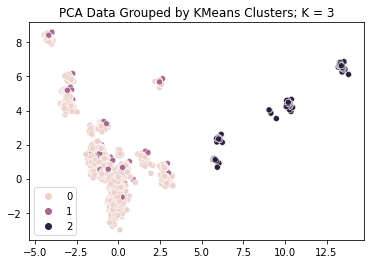

In [11]:
# Interesting to visualize how KMeans clusters the PCA data. (Using n_clusters = 10 since
# that resulted in highest Silhouette Score)
km = KMeans(n_clusters=3, random_state=13)
km.fit(X_pca)
labels = km.fit_predict(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=labels)
plt.title("PCA Data Grouped by KMeans Clusters; K = 3")
plt.show()


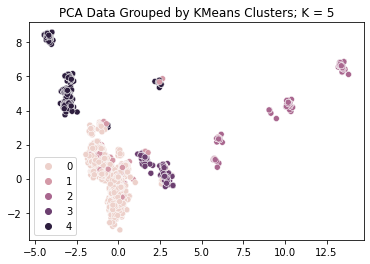

In [12]:
# Interesting to visualize how KMeans clusters the PCA data. (Using n_clusters = 10 since
# that resulted in highest Silhouette Score)
km = KMeans(n_clusters=5, random_state=13)
km.fit(X_pca)
labels = km.fit_predict(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=labels)
plt.title("PCA Data Grouped by KMeans Clusters; K = 5")
plt.show()

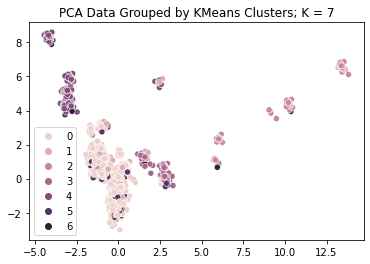

In [13]:
# Interesting to visualize how KMeans clusters the PCA data. (Using n_clusters = 10 since
# that resulted in highest Silhouette Score)
km = KMeans(n_clusters=7, random_state=13)
km.fit(X_pca)
labels = km.fit_predict(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=labels)
plt.title("PCA Data Grouped by KMeans Clusters; K = 7")
plt.show()

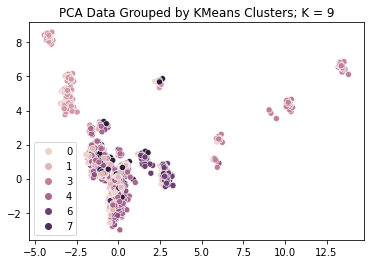

In [14]:
# Interesting to visualize how KMeans clusters the PCA data. (Using n_clusters = 10 since
# that resulted in highest Silhouette Score)
km = KMeans(n_clusters=9, random_state=13)
km.fit(X_pca)
labels = km.fit_predict(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=labels)
plt.title("PCA Data Grouped by KMeans Clusters; K = 9")
plt.show()


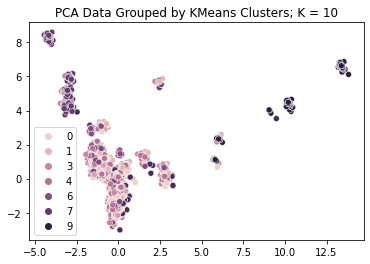

In [15]:
# Interesting to visualize how KMeans clusters the PCA data. (Using n_clusters = 10 since
# that resulted in highest Silhouette Score)
km = KMeans(n_clusters=10, random_state=13)
km.fit(X_pca)
labels = km.fit_predict(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=labels)
plt.title("PCA Data Grouped by KMeans Clusters; K = 10")
plt.show()


# Let's Apply T-SNE to our Data

In [16]:
# n components of 200 provided best results, therefore that will be used for analysis
tsne_results = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=250)
X_tsne = tsne_results.fit_transform(X_std)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.198s...
[t-SNE] Computed neighbors for 10000 samples in 14.164s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.565483
[t-SNE] KL divergence after 251 iterations: 1797693134862315708145274237317043

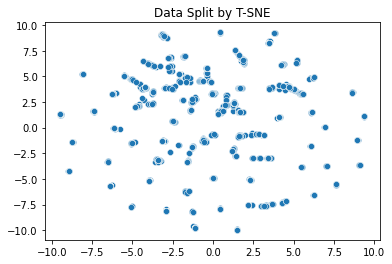

In [17]:
# adding a scatterplot to visualize how the data was split using PCA
# just eyeballing the plot there does not appear to be any noticeable clusters.
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1])
plt.title("Data Split by T-SNE")
plt.show()


In [18]:
X_tsne

array([[-2.913643  ,  8.803117  ],
       [ 1.6848845 , -0.78526443],
       [-5.097678  , -7.748177  ],
       ...,
       [-4.77842   ,  4.470791  ],
       [-9.479177  ,  1.2839205 ],
       [-0.35062304,  5.7992983 ]], dtype=float32)

In [19]:
for c in range(3, 11):
    gmm = GaussianMixture(n_components=c, random_state=42, max_iter=5000)
    cluster = gmm.fit(X_tsne)
    labels = gmm.fit_predict(X_tsne)
    print(
        f"The Silhouette Score for {c} clusters: "
        + str(metrics.silhouette_score(X_tsne, labels, metric="euclidean"))
    )


The Silhouette Score for 3 clusters: 0.37387797
The Silhouette Score for 4 clusters: 0.36289445
The Silhouette Score for 5 clusters: 0.34102127
The Silhouette Score for 6 clusters: 0.31709418
The Silhouette Score for 7 clusters: 0.31722406
The Silhouette Score for 8 clusters: 0.3360499
The Silhouette Score for 9 clusters: 0.33206674
The Silhouette Score for 10 clusters: 0.2560117


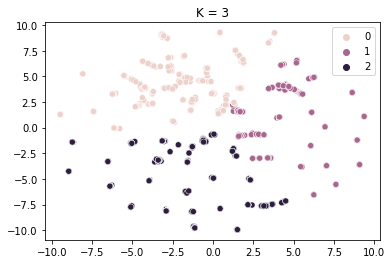

In [20]:
# Plot the solution.
gmm = GaussianMixture(n_components=3, random_state=42, max_iter=5000)
cluster = gmm.fit(X_tsne)
labels = gmm.fit_predict(X_tsne)

sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue = labels)
plt.title("K = 3")
plt.legend()
plt.show()


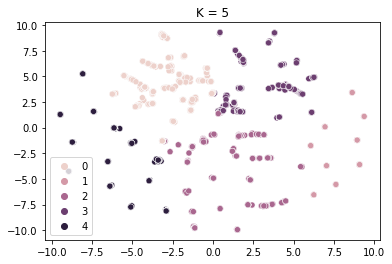

In [21]:
# Plot the solution.
gmm = GaussianMixture(n_components=5, random_state=42, max_iter=5000)
cluster = gmm.fit(X_tsne)
labels = gmm.fit_predict(X_tsne)

sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue = labels)
plt.title("K = 5")
plt.legend()
plt.show()


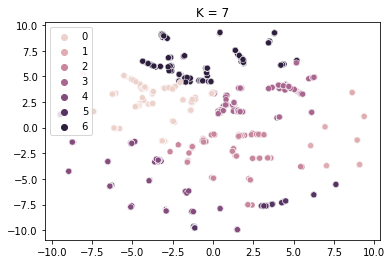

In [22]:
# Plot the solution.
gmm = GaussianMixture(n_components=7, random_state=42, max_iter=5000)
cluster = gmm.fit(X_tsne)
labels = gmm.fit_predict(X_tsne)

sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue = labels)
plt.title("K = 7")
plt.legend()
plt.show()


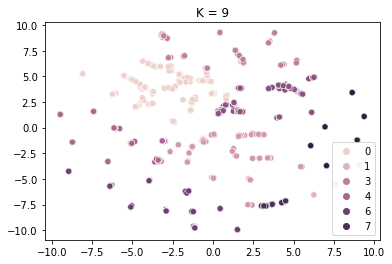

In [23]:
# Plot the solution.
gmm = GaussianMixture(n_components=9, random_state=42, max_iter=5000)
cluster = gmm.fit(X_tsne)
labels = gmm.fit_predict(X_tsne)

sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue = labels)
plt.title("K = 9")
plt.legend()
plt.show()


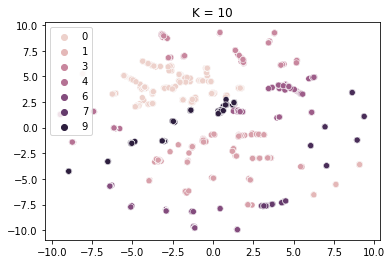

In [24]:
# Plot the solution.
gmm = GaussianMixture(n_components=10, random_state=42, max_iter=5000)
cluster = gmm.fit(X_tsne)
labels = gmm.fit_predict(X_tsne)

sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue = labels)
plt.title("K = 10")
plt.legend()
plt.show()


In [25]:
# adding the cluster labels to the original dataframe
master_df["Cluster"] = km.labels_


In [26]:
master_df.head()


,event_id,app_id,is_active,device_id,251,252,253,254,256,262,263,302,303,306,326,405,406,407,548,549,551,558,562,564,565,566,english_phone_brand_asus,english_phone_brand_coolpad,english_phone_brand_hammer,english_phone_brand_huawei,english_phone_brand_lshi,english_phone_brand_meizu,english_phone_brand_oppo,english_phone_brand_qiku,english_phone_brand_samsung,english_phone_brand_vivo,english_phone_brand_xiaomi,device_model_Galaxy Note 3,device_model_Galaxy Note 4,device_model_Galaxy S5,device_model_Galaxy S6,device_model_MI 3,device_model_MI 4,device_model_MX4,device_model_MX4 Pro,device_model_MX5,device_model_Mate 7,device_model_P8 Lite,device_model_P8max,device_model_R7 Plus,device_model_U3,device_model_X5SL,device_model_ZenFone 2,device_model_note顶配版,device_model_坚果手机,device_model_大神Note3,device_model_小米4C,device_model_小米note,device_model_红米2,device_model_红米2A,device_model_红米Note2,device_model_红米Note3,device_model_红米note,device_model_荣耀3C,device_model_荣耀6,device_model_荣耀6 Plus,device_model_荣耀7,device_model_荣耀7i,device_model_荣耀X2,device_model_荣耀畅玩4C,device_model_荣耀畅玩5X,device_model_超级手机1,device_model_超级手机1 Pro,device_model_超级手机1s,device_model_青春版,device_model_魅蓝NOTE,device_model_魅蓝metal,num_group,Cluster
9831,405967,-9142957261685295367,0,-6580990884053387838,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6
1860,23529,-5617926790284095062,0,-1237716434446458619,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,6
1103,7808,-2917998150844653076,0,1271622673586146475,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,4
473,2645,-5839858269967688123,0,-5044894706100277902,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6
2773,34376,7536856914263861653,0,-9170266620213363189,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,4


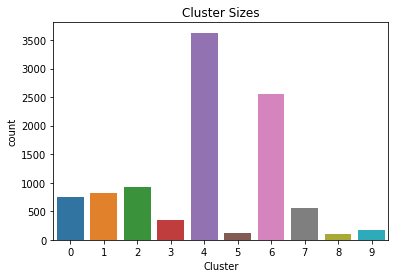

In [27]:
# Create bar chart for cluster sizes
sns.countplot(master_df["Cluster"])
plt.title("Cluster Sizes")
plt.legend
plt.show()


It appears that majority of the clusters are all around the same size, with cluster 4 and 6 being an exceptions.



In [28]:
master_df["Cluster"].value_counts()


4    3627
6    2561
2     926
1     811
0     746
7     563
3     354
9     179
5     127
8     106
Name: Cluster, dtype: int64

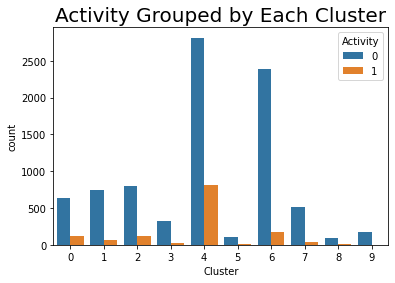

In [29]:
sns.countplot(data=master_df, x="Cluster", hue="is_active")
plt.legend(
    loc="upper right", title="Activity",
)
sns.set(rc={"figure.figsize": (20, 20)})
sns.set_style("whitegrid")
plt.title("Activity Grouped by Each Cluster", fontsize=20)
plt.show()


No noticeable pattern for activity within each cluster



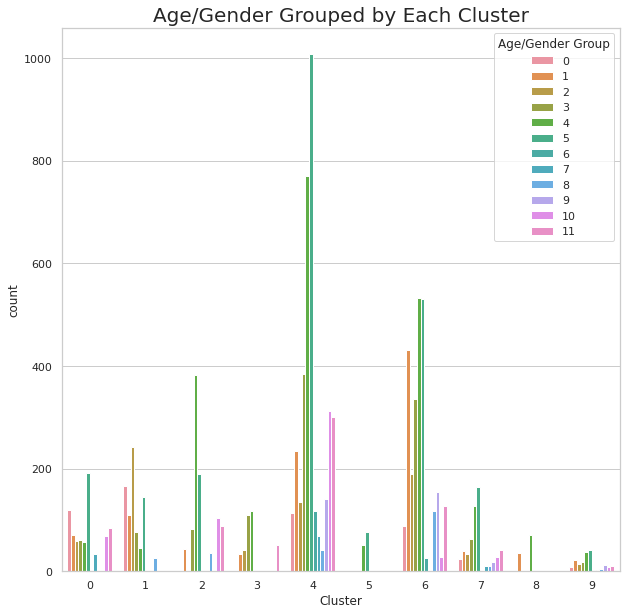

In [31]:
sns.countplot(data=master_df, x="Cluster", hue="num_group")
plt.legend(
    loc="upper right", title="Age/Gender Group",
)
sns.set(rc={"figure.figsize": (15, 15)})
sns.set_style("whitegrid")
plt.title("Age/Gender Grouped by Each Cluster", fontsize=20)
plt.show()


# Silhouette Score Comparison

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
pca = [0.09, 0.1, 0.13, 0.15, 0.17, 0.17, 0.20, 0.21]
tsne = [0.37, 0.36, 0.34, 0.31, 0.31, 0.33, 0.33, 0.25]

 
# Set position of bar on X axis
br1 = np.arange(len(pca))
br2 = [x + barWidth for x in br1]

plt.title("Silhouette Scores of Clusters",fontweight ='bold', fontsize = 15)

# Make the plot
plt.bar(br1, pca, color ='maroon', width = barWidth,
        edgecolor ='grey', label ='PCA/K-Means')
plt.bar(br2, tsne, color ='teal', width = barWidth,
        edgecolor ='grey', label ='T-SNE/GMM')

# Adding Xticks
plt.xlabel('Clusters', fontweight ='bold', fontsize = 15)
plt.ylabel('F1 Score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(tsne))],
        ['3', '4', '5', '6', '7', '8', '9', '10'])
 
plt.legend()
plt.show()

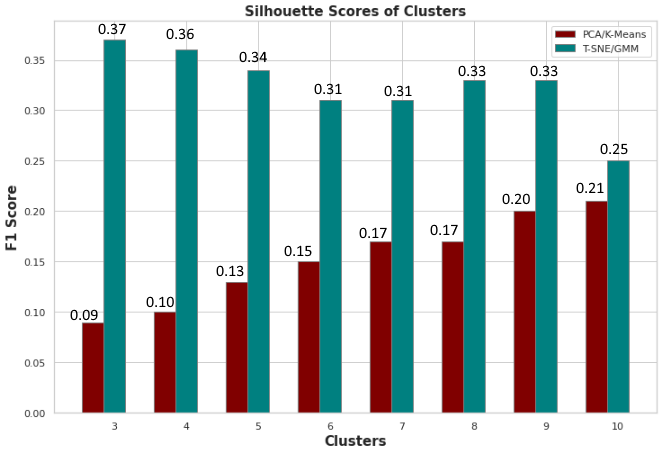